In [1]:
library(dplyr)
file='abalone.data'
abalone=read.csv(file,header=TRUE)
abalone = rename(abalone,     #rename each columns of the original dataset
                  Length=X0.455,
                  Diameter=X0.365,
                  Height=X0.095,
                  Whole_weight=X0.514,
                  Shucked_weight=X0.2245,
                  Viscera_weight=X0.101,
                  Shell_weight=X0.15,
                  Rings=X15)

str(abalone)   #check the types of each variable


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




'data.frame':	4176 obs. of  9 variables:
 $ M             : chr  "M" "F" "M" "I" ...
 $ Length        : num  0.35 0.53 0.44 0.33 0.425 0.53 0.545 0.475 0.55 0.525 ...
 $ Diameter      : num  0.265 0.42 0.365 0.255 0.3 0.415 0.425 0.37 0.44 0.38 ...
 $ Height        : num  0.09 0.135 0.125 0.08 0.095 0.15 0.125 0.125 0.15 0.14 ...
 $ Whole_weight  : num  0.226 0.677 0.516 0.205 0.351 ...
 $ Shucked_weight: num  0.0995 0.2565 0.2155 0.0895 0.141 ...
 $ Viscera_weight: num  0.0485 0.1415 0.114 0.0395 0.0775 ...
 $ Shell_weight  : num  0.07 0.21 0.155 0.055 0.12 0.33 0.26 0.165 0.32 0.21 ...
 $ Rings         : int  7 9 10 7 8 20 16 9 19 14 ...


In [2]:
na_counts=abalone %>%
   summarize_all(list(~ sum(is.na(.))))
na_counts  #check if there's any missing value exisits in each variable

M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


In [3]:
summary(abalone)  #check the quantile of each variable

      M                 Length         Diameter          Height      
 Length:4176        Min.   :0.075   Min.   :0.0550   Min.   :0.0000  
 Class :character   1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150  
 Mode  :character   Median :0.545   Median :0.4250   Median :0.1400  
                    Mean   :0.524   Mean   :0.4079   Mean   :0.1395  
                    3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650  
                    Max.   :0.815   Max.   :0.6500   Max.   :1.1300  
  Whole_weight    Shucked_weight   Viscera_weight     Shell_weight   
 Min.   :0.0020   Min.   :0.0010   Min.   :0.00050   Min.   :0.0015  
 1st Qu.:0.4415   1st Qu.:0.1860   1st Qu.:0.09337   1st Qu.:0.1300  
 Median :0.7997   Median :0.3360   Median :0.17100   Median :0.2340  
 Mean   :0.8288   Mean   :0.3594   Mean   :0.18061   Mean   :0.2389  
 3rd Qu.:1.1533   3rd Qu.:0.5020   3rd Qu.:0.25300   3rd Qu.:0.3290  
 Max.   :2.8255   Max.   :1.4880   Max.   :0.76000   Max.   :1.0050  
     Rings       
 M

In [4]:
unnatural=abalone[abalone$Height == 0, ]
unnatural    #get the observations with 0 height

,M,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1257,I,0.430,0.34,0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0,0.134,0.0575,0.0285,0.3505,6


In [5]:
abalone_clean=abalone[abalone$Height != 0, ]
dim(abalone_clean)  #remove the unnatural observations and check the number of observations

[1] 4174    9

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


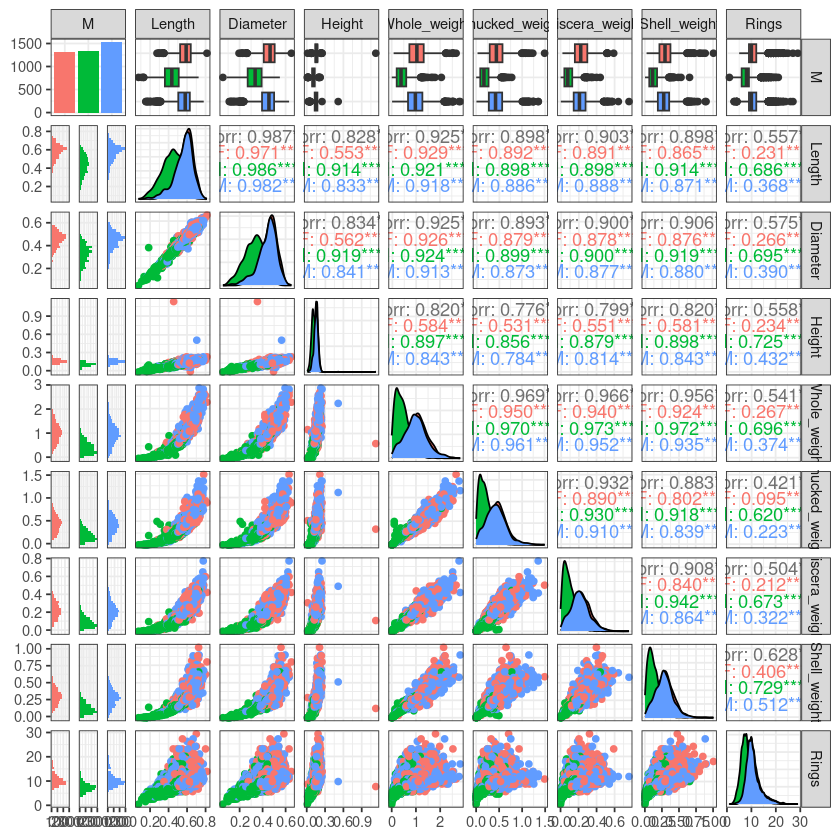

In [6]:
library("ggplot2")
library("GGally")
ggpairs(abalone_clean, aes(color = M)) + theme_bw()  #print the pairs plot, colored according to 'Sex'

,M,Length,Diameter,Height,Whole_weight,Water,Age
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2,0.350,0.265,0.090,0.2255,0.0075,Young
2,1,0.530,0.420,0.135,0.6770,0.0690,Middle
3,2,0.440,0.365,0.125,0.5160,0.0315,Middle
4,0,0.330,0.255,0.080,0.2050,0.0210,Young
5,0,0.425,0.300,0.095,0.3515,0.0130,Young
6,1,0.530,0.415,0.150,0.7775,0.0690,Old
7,1,0.545,0.425,0.125,0.7680,0.0645,Old
8,2,0.475,0.370,0.125,0.5095,0.0155,Middle
9,1,0.550,0.440,0.150,0.8945,0.1090,Old


[1] 153

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


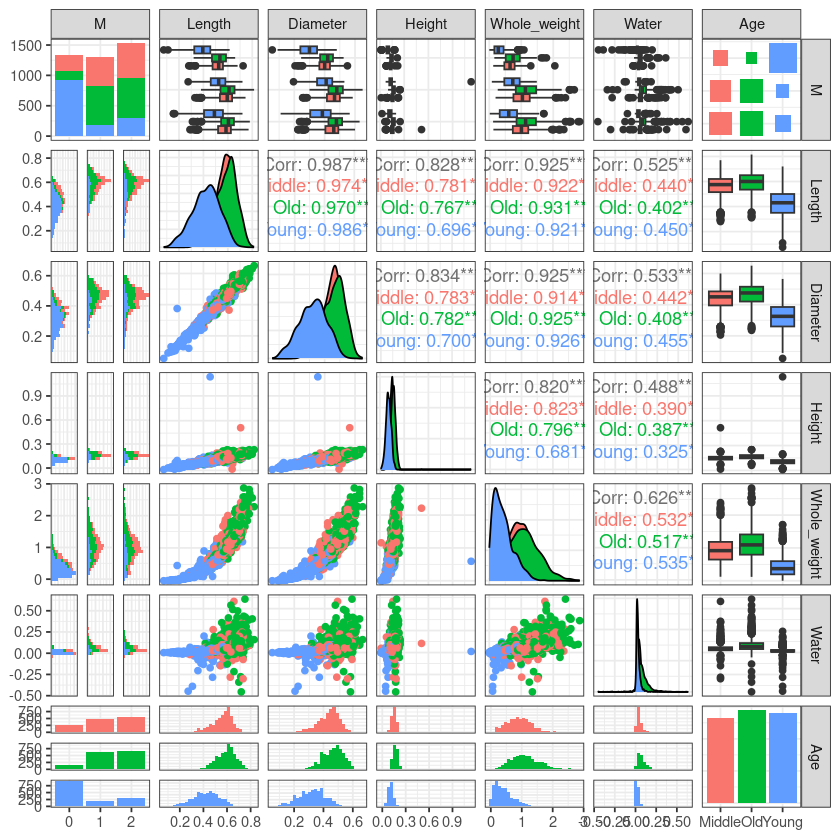

In [7]:
abalone_age = abalone_clean %>% 
  mutate(Age = case_when(
    Rings >= 1 & Rings <= 8 ~ "Young",
    Rings == 9 | Rings == 10 ~ "Middle",
    Rings >= 11 ~ "Old"
  ))     #classify the Rings
abalone_final = abalone_age %>%
    mutate(M = case_when(
    M=='I'~"0",
    M=='F'~"1",
    M=='M'~"2"))%>%select(-Rings,)%>%select(-Shucked_weight)%>%select(-Viscera_weight)%>%select(-Shell_weight)  
abalone_final$M=as.factor(abalone_final$M)  #change the type of M into factor
abalone_final$Water=abalone_clean$Whole_weight-abalone_clean$Shucked_weight-abalone_clean$Viscera_weight-abalone_clean$Shell_weight #set a new variable 'Water'
abalone_final=abalone_final%>%select(M,Length,Diameter,Height,Whole_weight,Water,Age)
abalone_final
nrow(abalone_final[abalone_final$Water < 0,])   #check if Water<0
library("ggplot2")
library("GGally")
ggpairs(abalone_final, aes(color = Age)) + theme_bw()  #print the pairs plot, colored according to Age

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


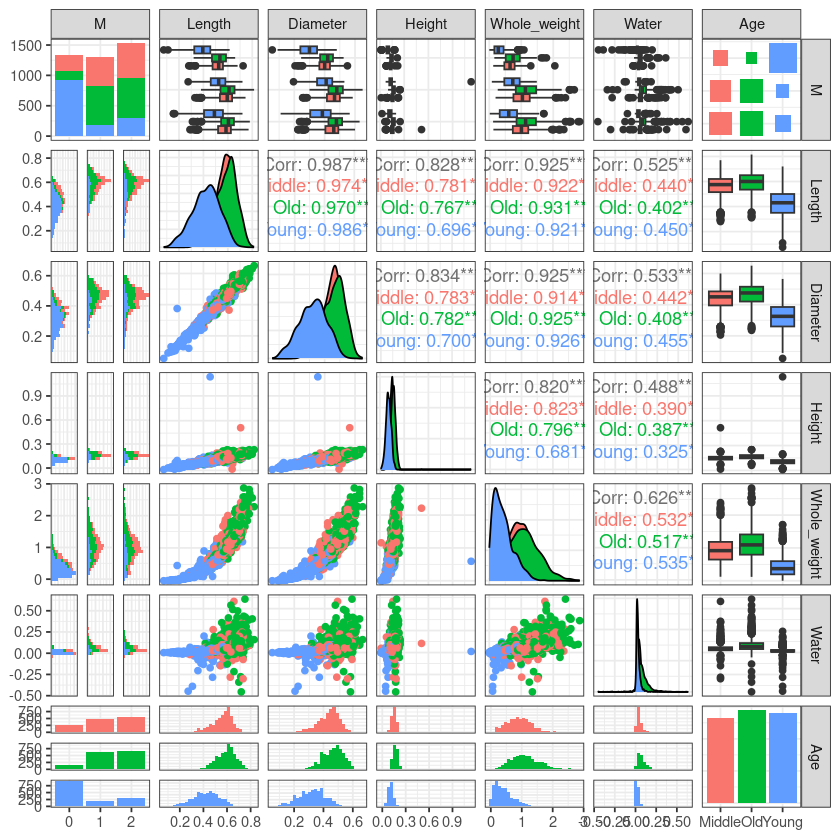

In [39]:
library("ggplot2")
library("GGally")
ggpairs(abalone_final, aes(color = Age)) + theme_bw()  #print the pairs plot, colored according to 'Sex'

,M,Length,Diameter,Height,Whole_weight,Water,Age
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,0,0.240,0.175,0.045,0.0700,-0.0050,Young
2,0,0.205,0.150,0.055,0.0420,-0.0105,Young
3,0,0.210,0.150,0.050,0.0420,-0.0030,Young
4,0,0.390,0.295,0.095,0.2030,-0.0045,Young
5,2,0.470,0.370,0.120,0.5795,-0.0805,Middle
6,2,0.450,0.345,0.105,0.4115,-0.0160,Young


,M,Length,Diameter,Height,Whole_weight,Water,Age
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2,0.350,0.265,0.090,0.2255,0.0075,Young
2,1,0.530,0.420,0.135,0.6770,0.0690,Middle
3,2,0.440,0.365,0.125,0.5160,0.0315,Middle
4,0,0.330,0.255,0.080,0.2050,0.0210,Young
5,0,0.425,0.300,0.095,0.3515,0.0130,Young
6,1,0.530,0.415,0.150,0.7775,0.0690,Old


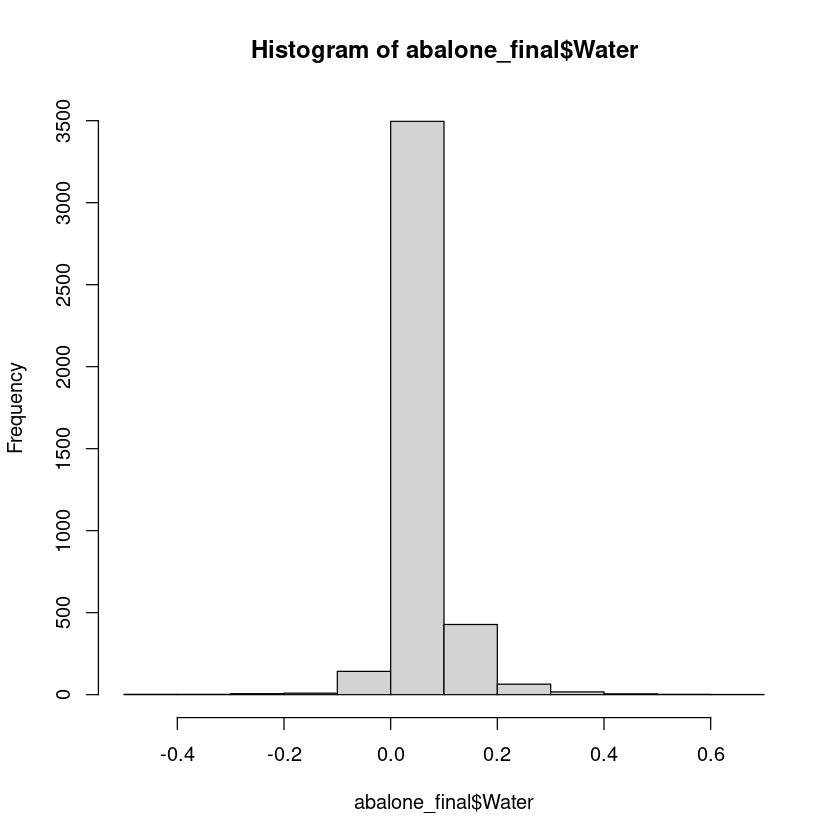

In [8]:
negative_water=abalone_final%>%filter(Water < 0)
head(negative_water)
head(abalone_final)
library(ggplot2)
hist(abalone_final$Water)




Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




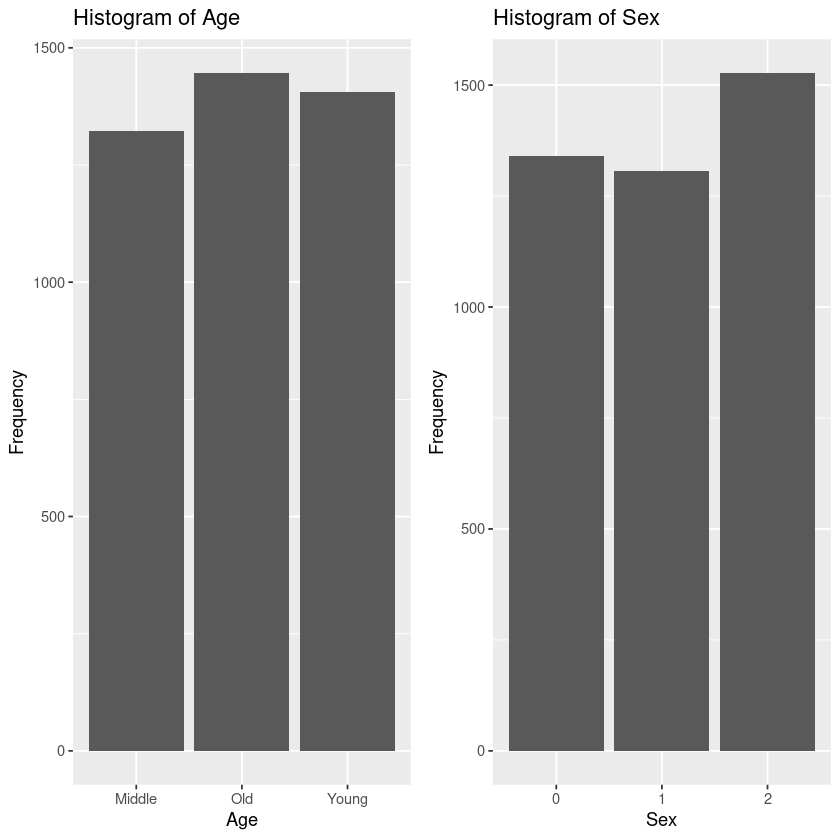

In [9]:
library(gridExtra)


plot1 = ggplot(abalone_final, aes(x = Age)) +
  geom_bar() +
  labs(title = "Histogram of Age", x = "Age", y = "Frequency")   #plot the histogram of Age

plot2 = ggplot(abalone_final, aes(x = M)) +
  geom_bar() +
  labs(title = "Histogram of Sex", x = "Sex", y = "Frequency")    #plot the histogram of Sex


grid.arrange(plot1, plot2, ncol = 2)


In [10]:
#CART 

In [11]:
set.seed(1234)
#Splitting dataset 
indexes = sample(1:nrow(abalone_final), size = 0.25 * nrow(abalone_final))   
abalone_train = abalone_final[-indexes,]
abalone_test = abalone_final[indexes,]
head(abalone_train)
head(abalone_test)
result=abalone_test

,M,Length,Diameter,Height,Whole_weight,Water,Age
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,2,0.350,0.265,0.090,0.2255,0.0075,Young
2,1,0.530,0.420,0.135,0.6770,0.0690,Middle
3,2,0.440,0.365,0.125,0.5160,0.0315,Middle
4,0,0.330,0.255,0.080,0.2050,0.0210,Young
5,0,0.425,0.300,0.095,0.3515,0.0130,Young
7,1,0.545,0.425,0.125,0.7680,0.0645,Old


,M,Length,Diameter,Height,Whole_weight,Water,Age
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1004,1,0.605,0.490,0.150,1.1345,0.0485,Middle
623,1,0.500,0.385,0.105,0.4980,0.0390,Old
2694,1,0.650,0.535,0.175,1.2895,0.0595,Middle
934,0,0.450,0.355,0.105,0.4445,0.0210,Young
2949,2,0.635,0.515,0.160,1.2075,0.0420,Old
2147,2,0.460,0.375,0.135,0.4935,0.0530,Old


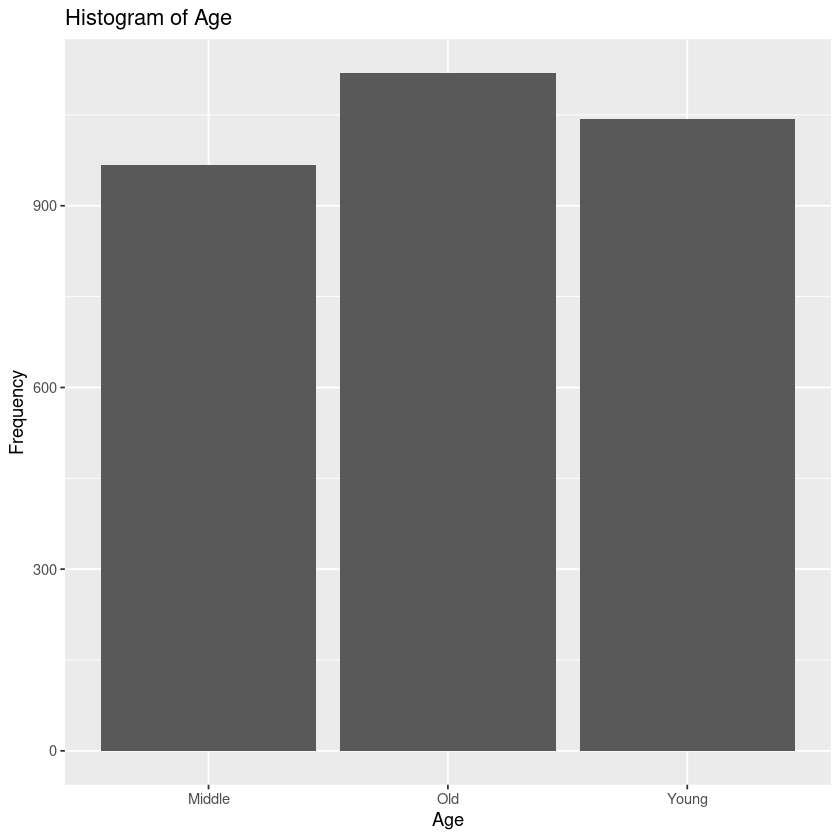

In [12]:
ggplot(abalone_train, aes(x = Age)) +
  geom_bar() +
  labs(title = "Histogram of Age", x = "Age", y = "Frequency")  #check the sample from different categories are even

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: lattice



n= 3131 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 3131 2012 Old (0.30916640 0.35739380 0.33343980)  
  2) Height>=0.1225 2162 1133 Old (0.37419056 0.47594820 0.14986124)  
    4) Water< 0.069 1394  769 Middle (0.44835007 0.34289813 0.20875179) *
    5) Water>=0.069 768  217 Old (0.23958333 0.71744792 0.04296875) *
  3) Height< 0.1225 969  249 Young (0.16408669 0.09287926 0.74303406) *


                   
check_predict_rpart Middle Old Young
             Middle    224 153    91
             Old        69 145     8
             Young      62  29   262

[1] "Accuracy: 0.604985618408437"
[1] "Precision:"
   Middle       Old     Young 
0.4786325 0.6531532 0.7422096 
[1] "Recall:"
   Middle       Old     Young 
0.6309859 0.4434251 0.7257618 
[1] "F1_score:"
   Middle       Old     Young 
0.5443499 0.5282332 0.7338936 


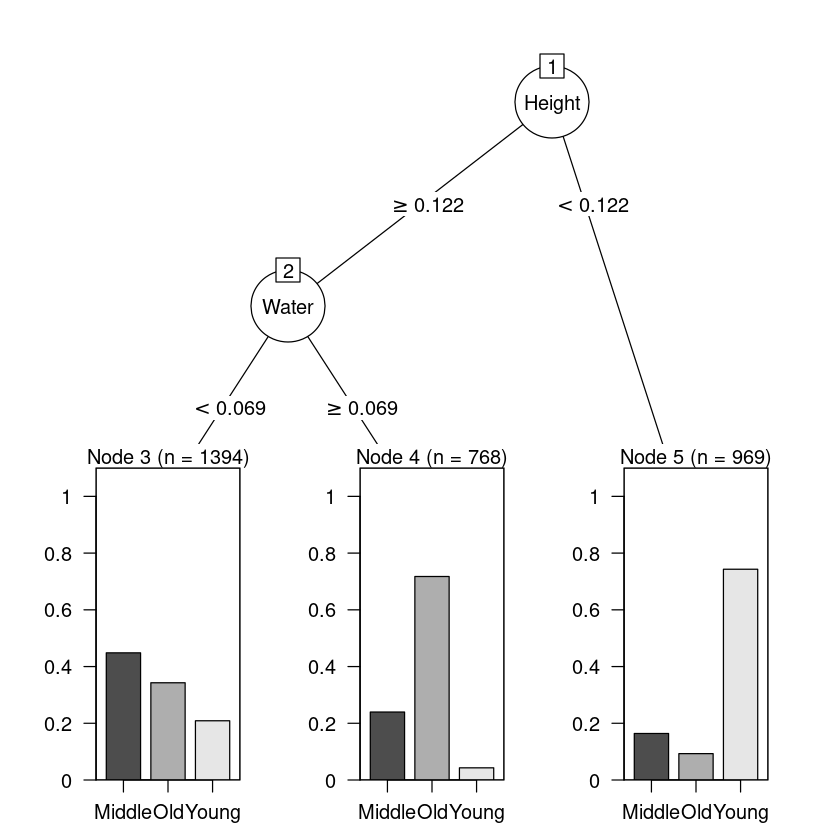

In [13]:
#caret
library(rpart)
library(ggparty)
library(caret)
fitControl = trainControl(method = "cv", number = 10)   #use 10-fold cross-validation
rpartFit1 = train(        #CART
  Age ~ .,                         
  data = abalone_train,          
  method = "rpart",                  
  trControl = fitControl        
)
print(rpartFit1$finalModel)
plot(as.party(rpartFit1$finalModel))
start_time = Sys.time()    #count the running-time
check_predict_rpart = predict(as.party(rpartFit1$finalModel), newdata = abalone_test)    #use the model to predict the test set
#check_fit

confusion_matrix1 =table(check_predict_rpart, abalone_test$Age)   #print the confusion matrix
confusion_matrix1
accuracy1=sum(diag(confusion_matrix1)) / sum(confusion_matrix1)    #calculate the accuracy,precision,recall,f1-score
precision=diag(confusion_matrix1) / rowSums(confusion_matrix1)
recall=diag(confusion_matrix1) / colSums(confusion_matrix1)
f1_score=2 * precision * recall / (precision + recall)
print(paste("Accuracy:", accuracy1))
print("Precision:")
print(precision)
print("Recall:")
print(recall)
print("F1_score:")
print(f1_score)
end_time = Sys.time()
execution_time1 =end_time - start_time


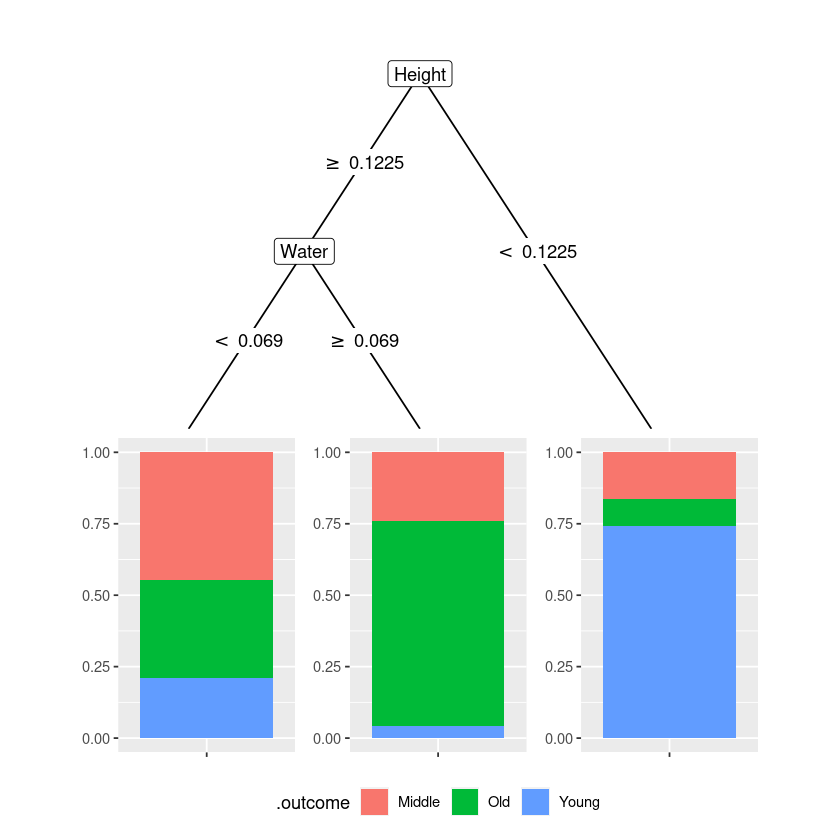

In [14]:
library(rpart)
autoplot(as.party(rpartFit1$finalModel))

In [15]:
check_fit_rpart = predict(rpartFit1, newdata = abalone_train)     #use the model on training set
table(check_fit_rpart, abalone_train$Age)

               
check_fit_rpart Middle Old Young
         Middle    625 478   291
         Old       184 551    33
         Young     159  90   720

In [16]:
confusion_matrix =table(check_fit_rpart, abalone_train$Age)
confusion_matrix
accuracy=sum(diag(confusion_matrix)) / sum(confusion_matrix)
precision=diag(confusion_matrix) / rowSums(confusion_matrix)
recall=diag(confusion_matrix) / colSums(confusion_matrix)
f1_score=2 * precision * recall / (precision + recall)
print(paste("Accuracy:", accuracy))
print("Precision:")
print(precision)
print("Recall:")
print(recall)
print("F1_score:")
print(f1_score)

               
check_fit_rpart Middle Old Young
         Middle    625 478   291
         Old       184 551    33
         Young     159  90   720

[1] "Accuracy: 0.605557329926541"
[1] "Precision:"
   Middle       Old     Young 
0.4483501 0.7174479 0.7430341 
[1] "Recall:"
   Middle       Old     Young 
0.6456612 0.4924039 0.6896552 
[1] "F1_score:"
   Middle       Old     Young 
0.5292125 0.5839958 0.7153502 


In [17]:
#Random Forest

In [24]:

library(caret)
library(ggparty)
library(rpart)
fitControl =trainControl(method = "cv", number = 10)  #use 10-fold cross-validation
grid =expand.grid(.mtry=3)  #consider 2 predictors for each split
rfFit = train(
  Age ~ .,                       
  data = abalone_train,            
  method = "rf",                   
  trControl = fitControl,      
  tuneGrid = grid,                 
  metric="Accuracy",
  ntree=2000
)
print(rfFit$finalModel)
varImp(rfFit$finalModel)
start_time = Sys.time()    #count the running-time
check_predict_rf=predict(rfFit,newdata=abalone_test)    #predict the testing set
confusion_matrix2=table(check_predict_rf,abalone_test$Age)   #print the confusion matrix
confusion_matrix2
accuracy2=sum(diag(confusion_matrix2)) / sum(confusion_matrix2)
precision=diag(confusion_matrix2) / rowSums(confusion_matrix2)
recall=diag(confusion_matrix2) / colSums(confusion_matrix2)
f1_score=2 * precision * recall / (precision + recall)
print(paste("Accuracy:", accuracy))
print("Precision:")
print(precision)
print("Recall:")
print(recall)
print("F1_score:")
print(f1_score)
end_time = Sys.time()

# 计算代码块执行时间（秒为单位）
execution_time2 = end_time - start_time


Call:
 randomForest(x = x, y = y, ntree = 2000, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 2000
No. of variables tried at each split: 3

        OOB estimate of  error rate: 37.14%
Confusion matrix:
       Middle Old Young class.error
Middle    449 344   175   0.5361570
Old       274 768    77   0.3136729
Young     189 104   751   0.2806513


,Overall
,<dbl>
M1,55.67692
M2,56.92345
Length,287.42846
Diameter,317.66284
Height,377.82491
Whole_weight,503.62823
Water,477.75148


                
check_predict_rf Middle Old Young
          Middle    154  93    54
          Old       133 206    30
          Young      68  28   277

[1] "Accuracy: 0.63782991202346"
[1] "Precision:"
   Middle       Old     Young 
0.5116279 0.5582656 0.7426273 
[1] "Recall:"
   Middle       Old     Young 
0.4338028 0.6299694 0.7673130 
[1] "F1_score:"
   Middle       Old     Young 
0.4695122 0.5919540 0.7547684 


In [19]:
check_fit_rf = predict(rfFit, newdata = abalone_train)  #use the model on the training set
table(check_fit_rf, abalone_train$Age)

            
check_fit_rf Middle  Old Young
      Middle    960    0     0
      Old         0 1114     0
      Young       8    5  1044

In [20]:
abalone_train2=abalone_train%>%filter(Age=='Old' | Age=='Middle')     #select the observations that Age is Old or Middle in two sets
abalone_test2=abalone_test%>%filter(Age=='Old'|Age=='Middle')

In [37]:
set.seed(5000)
library(randomForest)
time=system.time({
    


    check_predict_rf=predict(rfFit,newdata=abalone_test)
    rf_abalone2 = randomForest(as.factor(Age) ~ ., data = abalone_train2, mtry = 2,   #training a random forest on noe training set
                               ntree=300,
                               max_features=50,
                               importance=TRUE)
    rf_abalone2
    check_predict0=predict(rf_abalone2,newdata=abalone_test2)
    confusion_matrix0=table(check_predict0,abalone_test2$Age)   #use new testing set to test the new model
    confusion_matrix0
    accuracy=sum(diag(confusion_matrix0)) / sum(confusion_matrix0)
    precision=diag(confusion_matrix0) / rowSums(confusion_matrix0)
    recall=diag(confusion_matrix0) / colSums(confusion_matrix0)
    f1_score=2 * precision * recall / (precision + recall)
    print(paste("Accuracy:", accuracy))
    final_predictions2 = check_predict_rf
    old_middle_indices2 = which(abalone_test$Age %in% c("Old", "Middle"))  #replace the result of Old and Middle in the first model
    final_predictions2[old_middle_indices2] = check_predict0   #put new model's result into the original model
})

confusion_matrix70=table(final_predictions2,abalone_test$Age)
confusion_matrix70
accuracy3=sum(diag(confusion_matrix70)) / sum(confusion_matrix70)
precision=diag(confusion_matrix70) / rowSums(confusion_matrix70)
recall=diag(confusion_matrix70) / colSums(confusion_matrix70)
f1_score=2 * precision * recall / (precision + recall)
print(paste("Accuracy:", accuracy))
print("Precision:")
print(precision)
print("Recall:")
print(recall)
print("F1_score:")
print(f1_score)


[1] "Accuracy: 0.639296187683284"


                  
final_predictions2 Middle Old Young
            Middle    218 109    54
            Old       137 218    30
            Young       0   0   277

[1] "Accuracy: 0.639296187683284"
[1] "Precision:"
   Middle       Old     Young 
0.5721785 0.5662338 1.0000000 
[1] "Recall:"
   Middle       Old     Young 
0.6140845 0.6666667 0.7673130 
[1] "F1_score:"
   Middle       Old     Young 
0.5923913 0.6123596 0.8683386 


In [26]:
result=abalone_test    #add new cols to see the results of three models
result$cart=check_predict_rpart
result$rf=check_predict_rf
result$imp=final_predictions2
result$cart_right = (result$cart == result$Age)
result$rf_right = (result$rf == result$Age)
result$imp_right = (result$imp == result$Age)
result

,M,Length,Diameter,Height,Whole_weight,Water,Age,cart,rf,imp,cart_right,rf_right,imp_right
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<lgl>
1004,1,0.605,0.490,0.150,1.1345,0.0485,Middle,Middle,Middle,Middle,TRUE,TRUE,TRUE
623,1,0.500,0.385,0.105,0.4980,0.0390,Old,Young,Old,Middle,FALSE,TRUE,FALSE
2694,1,0.650,0.535,0.175,1.2895,0.0595,Middle,Middle,Old,Old,TRUE,FALSE,FALSE
934,0,0.450,0.355,0.105,0.4445,0.0210,Young,Young,Young,Young,TRUE,TRUE,TRUE
2949,2,0.635,0.515,0.160,1.2075,0.0420,Old,Middle,Middle,Middle,FALSE,FALSE,FALSE
2147,2,0.460,0.375,0.135,0.4935,0.0530,Old,Middle,Middle,Middle,FALSE,FALSE,FALSE
3176,1,0.490,0.380,0.130,0.5390,0.0095,Old,Middle,Old,Middle,FALSE,TRUE,FALSE
2775,0,0.585,0.460,0.145,0.8465,0.0455,Middle,Middle,Middle,Middle,TRUE,TRUE,TRUE
2375,2,0.340,0.275,0.090,0.2065,0.0210,Middle,Young,Young,Middle,FALSE,FALSE,TRUE


In [27]:
time   #evaluation
df = data.frame(
  Method = c('CART', 'Random Forest', 'Improve'),
  Accuracy = c(accuracy1,accuracy2,accuracy3),
  `Running-time` = c(execution_time1,execution_time2,time['elapsed'])
)

print(df)

   user  system elapsed 
  1.003   0.016   1.019 

         Method  Accuracy   Running.time
1          CART 0.6049856 0.0726974 secs
2 Random Forest 0.6107383 0.3394408 secs
3       Improve 0.6826462 1.0190000 secs
